ModuleNotFoundError: No module named 'geopy'

In [2]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.2 MB/s eta 0:00:001 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.7 MB/s eta 0:00:000:00:01 eta 0:00:01
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need 

In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [13]:
import json
from geopy import distance
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


def speed_location(point_list, point):
    if point not in point_list:
        point_list.append([point, 1])
    for i in range(len(point_list)):
        if distance.distance(point_list[i][0], point) < 0.5 and point_list[i][0] != point:
            point_list[i][1] += 1
    return point_list


def calculate_time(bus_list, index):
    format = '%Y-%m-%d %H:%M:%S'
    time1 = datetime.strptime(bus_list[index - 1].get('Time'), format)
    time2 = datetime.strptime(bus_list[index].get('Time'), format)
    time = time2 - time1
    time = time.total_seconds() / 3600
    return time


def position(bus_list, index):
    pos = (bus_list[index].get('Lat'), bus_list[index].get('Lon'))
    return pos


def calculate_distance(bus_list, index):
    pos1 = position(bus_list, index - 1)
    pos2 = position(bus_list, index)
    dis = distance.distance(pos1, pos2).km
    return dis


def number_of_buses(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return len(data)


def bus_speed_check(filename):
    point_list = []
    speed_counter = 0
    slow_counter = 0
    with open(filename, 'r') as file:
        data = json.load(file)
    for bus_list in data:
        speeding = False
        slow = True
        for j in range(1, len(bus_list)):
            dis = calculate_distance(bus_list, j)
            time = calculate_time(bus_list, j)
            if time != 0:
                vel = dis / time
            else:
                vel = 0
            if vel > 30:
                slow = False
            if vel > 50:
                speeding = True
                point_list = speed_location(point_list, position(bus_list, j))
        if speeding:
            speed_counter += 1
        if slow:
            slow_counter += 1
    return speed_counter, point_list, slow_counter



filename = 'bus_positions_divided.json'
filename2 = 'bus_positions_divided2.json'
tup1 = bus_speed_check(filename)
tup2 = bus_speed_check(filename2)

speeding1 = tup1[0]
point_list1 = tup1[1]
slow1 = tup1[2]
all_buses1 = number_of_buses(filename)

speeding2 = tup2[0]
point_list2 = tup2[1]
slow2 = tup2[2]
all_buses2 = number_of_buses(filename2)

point_list_sorted1 = sorted(point_list1, key=lambda x: x[1], reverse=True)
point_list_sorted2 = sorted(point_list2, key=lambda x: x[1], reverse=True)

hours = ['13:00', '16:00']
values = [speeding1, speeding2]
colors = ['green', 'purple']
bar_width = 0.3

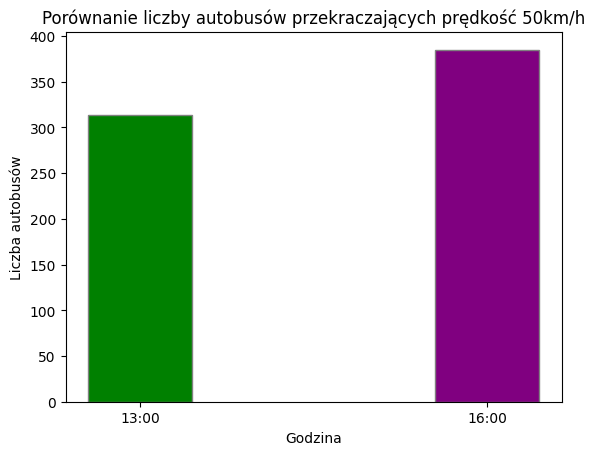

In [12]:
hours = ['13:00', '16:00']
values = [speeding1, speeding2]
colors = ['green', 'purple']
bar_width = 0.3

plt.bar(hours, values, width=bar_width, color=colors, edgecolor='grey')
plt.xlabel('Godzina')
plt.ylabel('Liczba autobusów')
plt.title('Porównanie liczby autobusów przekraczających prędkość 50km/h')
plt.show()

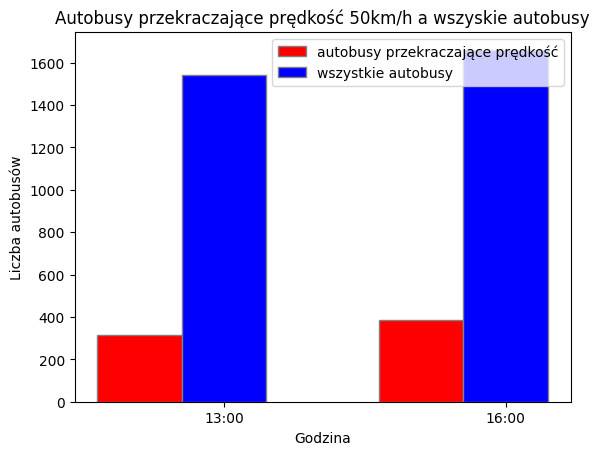

In [13]:
speeding_buses = [speeding1, speeding2]
all_buses = [all_buses1, all_buses2]

r1 = np.arange(len(speeding_buses))
r2 = [x + bar_width for x in r1]

plt.bar(r1, speeding_buses, color='red', width=bar_width, edgecolor='grey', label='autobusy przekraczające prędkość')
plt.bar(r2, all_buses, color='blue', width=bar_width, edgecolor='grey', label='wszystkie autobusy')

plt.xlabel('Godzina')
plt.xticks([r + bar_width for r in range(len(speeding_buses))], hours)
plt.ylabel('Liczba autobusów')
plt.title('Autobusy przekraczające prędkość 50km/h a wszyskie autobusy')
plt.legend()
plt.show()

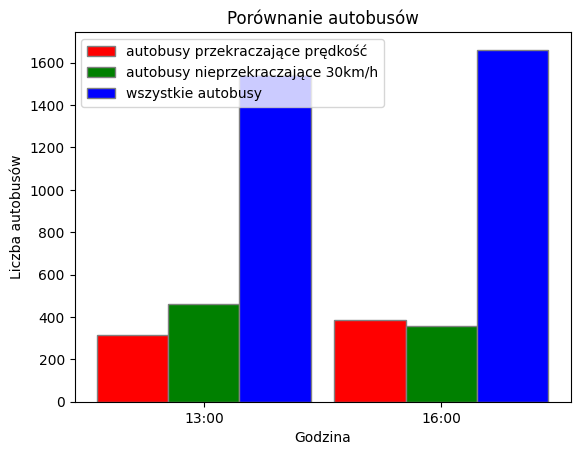

In [14]:
speeding_buses = [speeding1, speeding2]
all_buses = [all_buses1, all_buses2]
slow_buses = [slow1, slow2]

r1 = np.arange(len(speeding_buses))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

plt.bar(r1, speeding_buses, color='red', width=bar_width, edgecolor='grey', label='autobusy przekraczające prędkość')
plt.bar(r2, slow_buses, color='green', width=bar_width, edgecolor='grey', label='autobusy nieprzekraczające 30km/h')
plt.bar(r3, all_buses, color='blue', width=bar_width, edgecolor='grey', label='wszystkie autobusy')

plt.xlabel('Godzina')
plt.xticks([r + bar_width for r in range(len(speeding_buses))], hours)
plt.ylabel('Liczba autobusów')
plt.title('Porównanie autobusów')
plt.legend()
plt.show()

In [16]:
df = pd.DataFrame(point_list_sorted1, columns=['Współrzędne', 'liczba autobusów'])
df.head()

,Współrzędne,liczba autobusów
0,"(52.2892201, 21.0001146)",21
1,"(52.2903099, 21.0032699)",18
2,"(52.28915, 21.000593)",18
3,"(52.2851225, 20.9907813)",17
4,"(52.29092, 20.999451)",17
